# Figure 9

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from constants import *
from reader import KuiperBeltData

In [41]:
r10 = np.load("R_10_bi_rhopsmax_3_2_tmax_10000000_m_truncated_CO.npz")
r15 = np.load("R_15_bi_rhopsmax_3_2_tmax_10000000_m_truncated_CO.npz")
r20 = np.load("R_20_bi_rhopsmax_3_2_tmax_5790000_m_truncated_CO.npz")
r22 = np.load("R_22_bi_rhopsmax_3_2_tmax_8500000_m_truncated_CO.npz")
r25 = np.load("R_25_bi_rhopsmax_3_2_tmax_10000000_m_truncated_CO.npz")
r30 = np.load("R_30_bi_rhopsmax_3_2_tmax_10000000_m_truncated_CO.npz")

In [42]:
for key in r10.keys():
    print(key)

t
dt
mass
ice_fraction
density
porosity


In [43]:
data  = [r10, r15, r20, r22, r25, r30]
radii = [10, 15,  20, 22, 25,  30]
times = [r10["t"][-1], r15["t"][-1], r20["t"][-1], r22["t"][-1], r25["t"][-1], r30["t"][-1]]
kbos = KuiperBeltData()

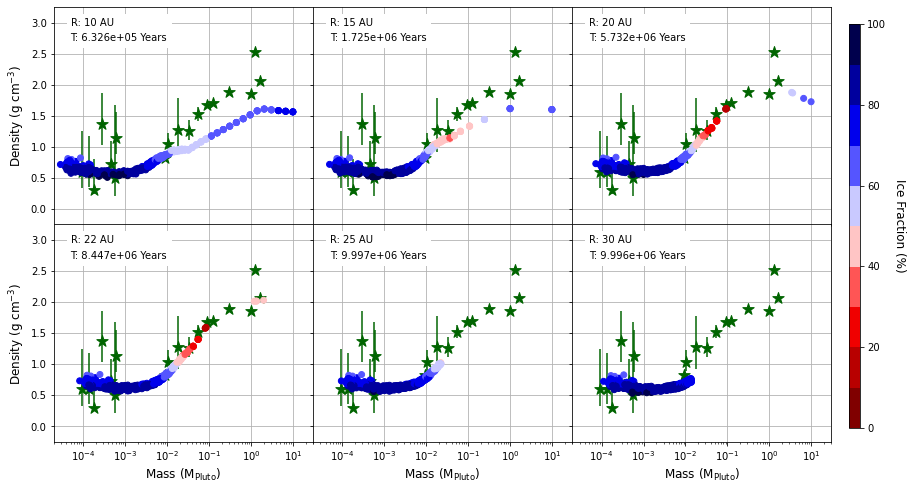

In [44]:
fig = plt.figure(figsize=(16, 8))
axes =fig.subplots(nrows=2, ncols=3, sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)
cmap = plt.cm.seismic_r
norm = colors.BoundaryNorm(np.arange(0, 110, 10), cmap.N)


sm = 12


counter = 0
for row in range(len(axes)):
    for col in range(len(axes[0])):
        ax = axes[row][col]
        
        im = ax.scatter(data[counter]["mass"][-1] / M_PLUTO, data[counter]["density"][-1], c = data[counter]["ice_fraction"][-1] * 100, cmap=cmap, norm=norm, zorder=2.5)
        ax.scatter(kbos.mass / M_PLUTO, kbos.density, c="darkgreen", marker="*", s=12 ** 2, zorder=2)
        ax.errorbar(x=kbos.mass / M_PLUTO, y=kbos.density, yerr=[kbos.min_density, kbos.max_density], ls='none', ecolor='darkgreen')
        ax.set_xscale('log')
        ax.set_xlim(2e-5, 3e1)
        ax.set_ylim(-0.25, 3.25)
        ax.text(5e-5, 2.95, f"R: {radii[counter]} AU                 ", fontsize=10, backgroundcolor="#FFF")
        ax.text(5e-5, 2.7, f"T: {times[counter] / YRS_TO_SEC:.3e} Years", fontsize=10, backgroundcolor="#FFF")
        ax.grid()
        
        if row == 1:
            ax.set_xlabel(r"Mass (M$_{\rm{Pluto}}$)", fontsize=12)
            
        if col == 0:
            ax.set_ylabel(r"Density (g cm$^{-3}$)", fontsize=12)
        
        counter += 1
cbar_ax = fig.add_axes([0.815, 0.15, 0.01, 0.7])
fig.subplots_adjust(right=0.8)
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Ice Fraction (%)", fontsize=12, labelpad=20, rotation=270)
plt.savefig(fname="KBOs_v_r.pdf", format="pdf", dpi=350, bbox_inches='tight')